In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import sys
if '..' not in sys.path:
    sys.path.insert(0,'..')

In [17]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=50_000, n_features=20, n_informative=8, n_redundant=8, shuffle=False, random_state=42)
X = pd.DataFrame(X, columns=[f'feat_{idx}' for idx in range(X.shape[1])])
y = pd.Series(y)

from sklearn.model_selection import train_test_split
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=.1)
X_tr = X_tr.reset_index(drop=True)
X_ts = X_ts.reset_index(drop=True)
y_tr = y_tr.reset_index(drop=True)
y_ts = y_ts.reset_index(drop=True)

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  17 out of  25 | elapsed:  2.4min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:  2.6min remaining:   38.8s
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:  2.8min remaining:   14.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.8s finished


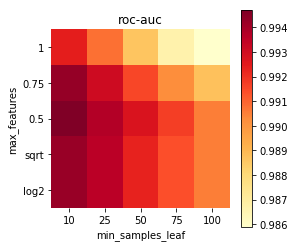

CPU times: user 1.24 s, sys: 534 ms, total: 1.78 s
Wall time: 2min 47s


(RandomForestClassifier(bootstrap=True, class_weight='balanced',
             criterion='gini', max_depth=None, max_features=0.5,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=10,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, n_jobs=1, oob_score=False, random_state=42,
             verbose=0, warm_start=False), 0.9947120145659614)

In [22]:
from ml_tools.rf_hacks import set_rf_samples
set_rf_samples()

from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()

from ml_tools.optimization.classification import optimize_rf
%time optimize_rf(model_rf, X_tr, y_tr, X_ts, y_ts)

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  17 out of  25 | elapsed:  2.4min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:  2.6min remaining:   38.8s
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:  2.8min remaining:   14.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.8s finished


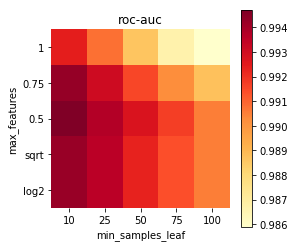

CPU times: user 1.17 s, sys: 326 ms, total: 1.49 s
Wall time: 2min 46s


(RandomForestClassifier(bootstrap=True, class_weight='balanced',
             criterion='gini', max_depth=None, max_features=0.5,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=10,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, n_jobs=1, oob_score=False, random_state=42,
             verbose=0, warm_start=False), 0.9947120145659614)

In [23]:
from ml_tools.rf_hacks import reset_rf_samples
reset_rf_samples()

from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()

from ml_tools.optimization.classification import optimize_rf
%time optimize_rf(model_rf, X_tr, y_tr, X_ts, y_ts)

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done  17 out of  25 | elapsed:   48.2s remaining:   22.7s
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:   53.9s remaining:   13.5s
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:   57.3s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   59.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done  14 out of  25 | elapsed:    0.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.7s finished


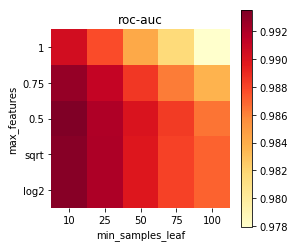

CPU times: user 1.05 s, sys: 442 ms, total: 1.49 s
Wall time: 1min


(RandomForestClassifier(bootstrap=True, class_weight='balanced',
             criterion='gini', max_depth=None, max_features=0.5,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=10,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, n_jobs=1, oob_score=False, random_state=42,
             verbose=0, warm_start=False), 0.9935538676713968)

In [24]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()

from ml_tools.optimization.classification import optimize_rf
%time optimize_rf(model_rf, X_tr.head(20_000), y_tr.head(20_000), X_ts, y_ts)